<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%99%95%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> A사건이 발생할 확률 **P(A)**

0<=P(A)<=1

> B사건이 발생하고 A사건이 발생할 확률 **P(A|B)**

> 만약, A와 B가 독립 사건이라면 

P(A|B) = P(A) * P(B) 

> A,B,C,D는 독립 사건이라면

P(A|B|C|D) = P(A)* P(B) * P(C) * P(D)






#로지스틱 회귀



```
목적 : 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것
```



#확률

In [1]:
import enum,random
import math
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#파이썬은 상수를 제공하고 있지 않아서 클래스로 만듦
class Coin(enum.Enum):
  FRONT=0
  BACK=1
  def random_coin():
    return random.choice([Coin.FRONT, Coin.BACK])

In [3]:
for _ in range(20):
  if Coin.random_coin() == Coin.FRONT:
    print(".",end=' ')
  else:
    print("1",end=' ')

. 1 1 . . 1 1 1 . . . . . 1 . . . . 1 1 




---

##만약에 동전을 두 번 던졌을 때 P(both|first)와 P(both|either)를 구하시오.


*   P(both|first) 첫 번째 던졌을 때 앞면이 나오고 둘 다 앞면이 나올 확률

*   P(both|either) 둘 중 하나가 앞면이 나오고 둘 다 앞면이 나올 확률








In [4]:
both_back = 0 #둘 다 뒷면이 나온 횟수
first_back = 0 #첫 번째 뒷면이 나온 횟수
either_back = 0 #둘 중 하나는 뒷면이 나온 횟수

for _ in range(10000):
  first = Coin.random_coin()
  second = Coin.random_coin()
  if first == Coin.BACK:
    first_back+=1
  if first==Coin.BACK and second == Coin.BACK:
    both_back+=1
  if first==Coin.BACK or second == Coin.BACK:
    either_back+=1
print("P(both|first)",both_back/first_back)
print("P(both|either)",both_back/either_back)

P(both|first) 0.49690680502893636
P(both|either) 0.33293221018852787


#균등분포와 누적분포


```
이산균등분포 : 이산확률분포중 확률 함수가 정의된 모든 곳에서 그 값이 일정한 분포
```



In [5]:
def uniform_pdf(x): #균등 분포
  if 0<=x<1:
    return 1
  return 0

In [6]:
def uniform_cdf(x): #누적 분포
  if x<0:
    return 0
  if x<1:
    return x
  return 1

In [7]:
xs = []
pys = []
cys = []
#1~2까지 step=0.01로 균등 분포와 누적 분포를 계산하여 컬렉션에 보관
for x_100 in range(-100,200):
  pys.append(uniform_pdf(x_100/100))
  cys.append(uniform_cdf(x_100/100))
  xs.append(x_100/100)

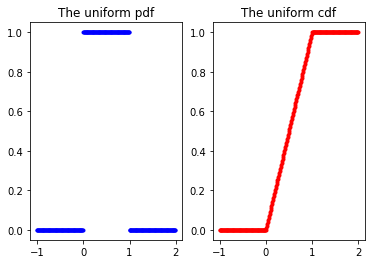

In [8]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].plot(xs,pys,"b.",label="pdf")
ax[1].plot(xs,cys,"r.",label="cdf")
ax[0].set_title("The uniform pdf")
ax[1].set_title("The uniform cdf")
plt.show()

#정규분포

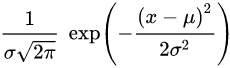

- pdf : 확률밀도함수, probability density function  
 확률 밀도 함수 f(x)와 구간 [a,b] [a,b]에 대해서 확률 변수X가 구간에 포함될 확률 P(a<=X<=b)

In [11]:
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)
def normal_pdf(x, mu=0, sigma=1):  #정규분포 식을 코드로 표현 (mu:평균, sigma:표준편차)
  pre = 1/(sigma*SQRT_TWO_PI)
  post = math.exp(-((x-mu)**2)/(2*(sigma**2)))
  return pre * post

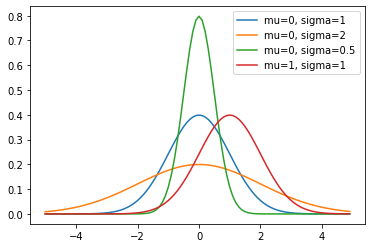

In [12]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_pdf(x,sigma=1) for x in xs]
ys2 = [normal_pdf(x,sigma=2) for x in xs]
ys3 = [normal_pdf(x,sigma=0.5) for x in xs]
ys4 = [normal_pdf(x,mu=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0, sigma=1")
plt.plot(xs,ys2,'-',label="mu=0, sigma=2")
plt.plot(xs,ys3,'-',label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-',label="mu=1, sigma=1")
plt.legend()
plt.show()

##정규누적분포
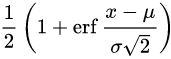

- cdf : 누적분포함수, cumulative distribution function  
주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수

In [14]:
def normal_cdf(x,mu=0,sigma=1): #정규누적분포
  return (1+math.erf((x-mu)/(sigma*math.sqrt(2))))/2

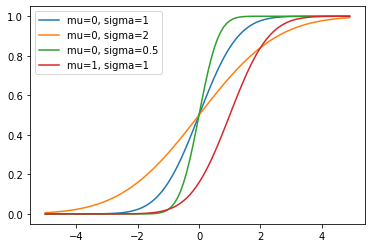

In [15]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_cdf(x,sigma=1) for x in xs]
ys2 = [normal_cdf(x,sigma=2) for x in xs]
ys3 = [normal_cdf(x,sigma=0.5) for x in xs]
ys4 = [normal_cdf(x,mu=1) for x in xs]
plt.plot(xs,ys1,'-',label="mu=0, sigma=1")
plt.plot(xs,ys2,'-',label="mu=0, sigma=2")
plt.plot(xs,ys3,'-',label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-',label="mu=1, sigma=1")
plt.legend()
plt.show()

#베르누이 시행

In [16]:
def bernouli_trial(p):
  return 1 if random.random()<p else 0

In [19]:
cnt=0
for _ in range(100):
  re = bernouli_trial(1/6) #확률이 1/6인 사건이 발생하면 1, 발생하지 않으면 0 출력
  print(re, end=',')
  if re == 1:
    cnt += 1
print()
print(cnt)

0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,
19


In [24]:
def binomial(n,p):
  return sum(bernouli_trial(p) for _ in range(n)) #성공한 횟수 리턴

In [25]:
for _ in range(20):
  print(binomial(100,1/6),end=',') #주사위를 100번 던졌을 때 숫자 1이 나올 확률

17,13,16,18,15,15,7,24,14,12,19,18,16,25,18,21,19,16,18,19,

In [40]:
from collections import Counter

def binomial_histogram(p,n,nps): #p: 평균, n: 시도한 횟수, nps: (p,n)을 시도할 횟수
  data = [ binomial(n,p) for _ in range(nps)]
  # print(data)
  # print(len(data))
  histogram = Counter(data)
  # print(histogram.values()) # 1이 나온 횟수가 keys 번인 시도횟수들
  # print(histogram.keys()) # 1이 나온 횟수
  # print([v/nps for v in histogram.values()]) # values를 1200번(nps)으로 나눔
  mu = p*n #평균
  sigma = math.sqrt(n*p*(1-p)) #표준편차
  xs = range(min(data),max(data)+1)
  ys = [normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs] #누적분포값의 차이로 변화량 구하기
  plt.bar(histogram.keys(),[v/nps for v in histogram.values()],color='b') #실제 주사위를 던졌을 때 나온 분포(히스토그램)
  plt.plot(xs,ys)
  plt.title("Binomial Distribution and Normal Approximation") #이항 분포와 정규 근사
  plt.show()

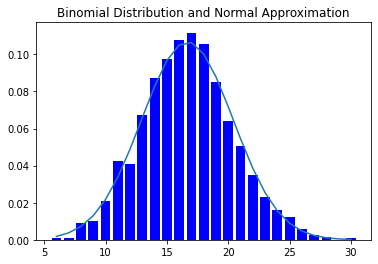

In [41]:
binomial_histogram(1/6,100,1200) #100번 던졌을 때, 1/6 확률로 성공하는 사건을 1200번 수행

#로지스틱 회귀

In [42]:
import numpy as np
def sigmoid(x): #시그모이드 함수, 로지스틱함수와 같은 함수
  return 1/(1+np.e**(-x))

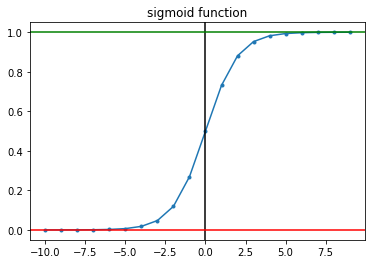

In [44]:
xs = range(-10,10)
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys,marker='.')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='red')
plt.axhline(y=1,color='green')
plt.title("sigmoid function")
plt.show()

In [46]:
def gradient(y,x,w,b):
  wd = x*(sigmoid(w*x+b)-y)
  bd = (sigmoid(w*x+b)-y)
  return wd,bd

In [47]:
def gradient_descent(xs,ys,lr=0.001,epochs=100):
  if isinstance(xs,list):
    xs = np.array(xs).reshape(-1)
  wbhl = [] #학습 과정에서의 가중치와 편향을 보관하기 위함

  wp = np.random.uniform(-1,1) #초기 가중치를 랜덤하게 결정
  bp = np.random.uniform(-1,1) #초기 편향

  for epoch in range(epochs):
    for i,x in enumerate(xs):
      wd,bd = gradient(ys[i],x,wp,bp)
      wp = wp - (wd*lr) #가중치를 경사*lr 만큼 빼준다(곡선 아래 부분으로 이동)
      bp = bp - (bd*lr) #편향을 경사*lr 만큼 빼준다 이하동일
    wbhl.append([wp,bp])
  return wp,bp,wbhl

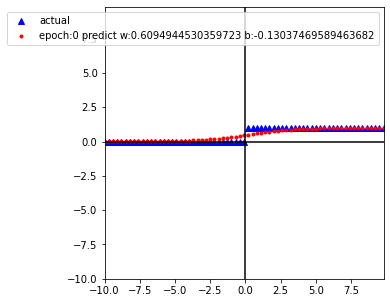

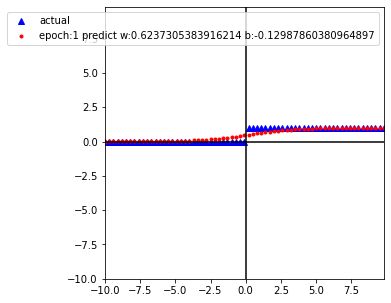

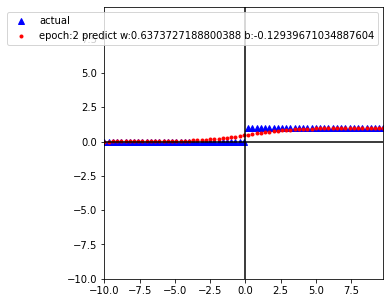

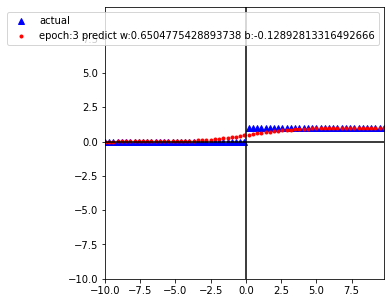

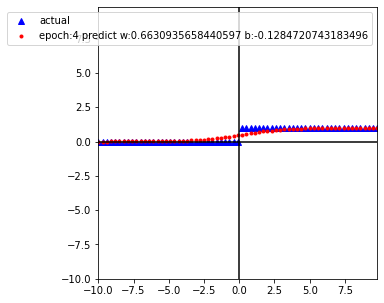

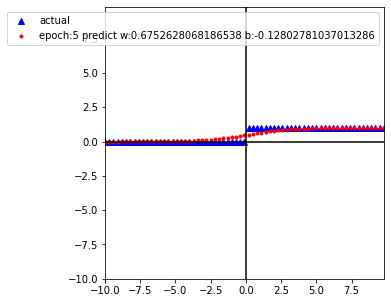

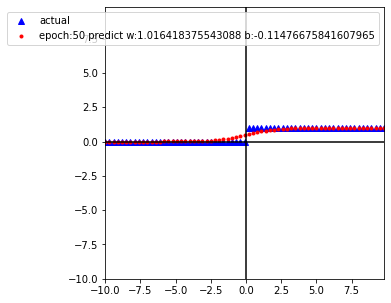

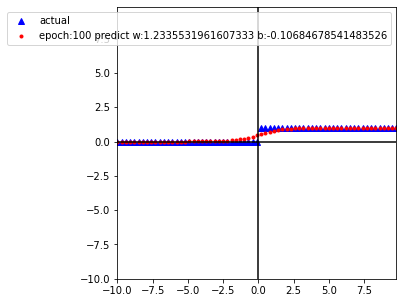

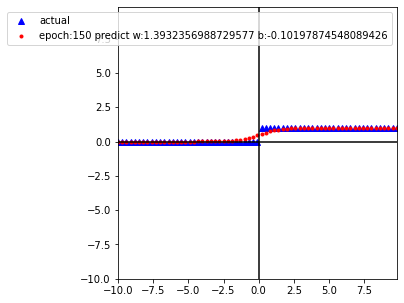

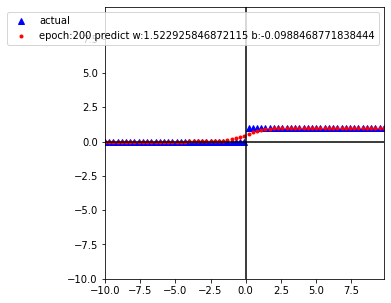

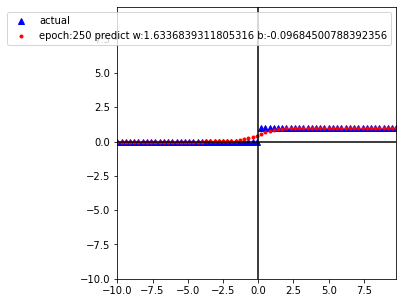

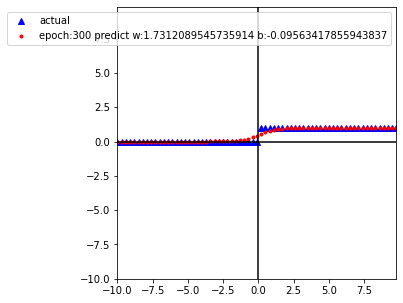

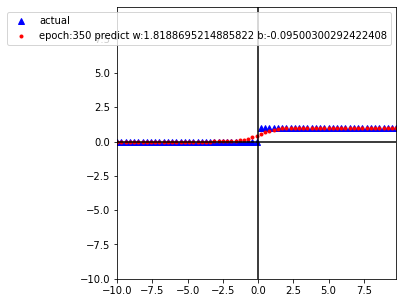

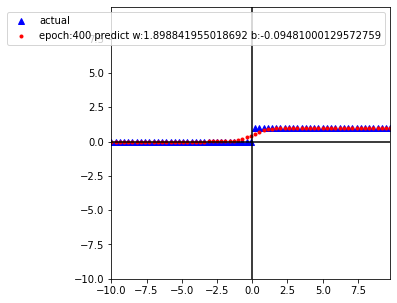

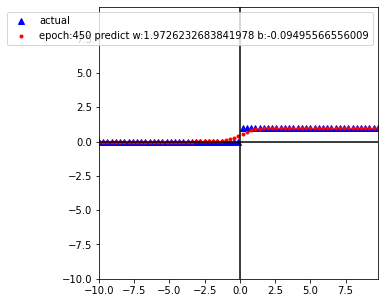

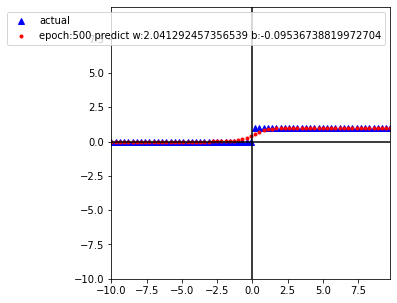

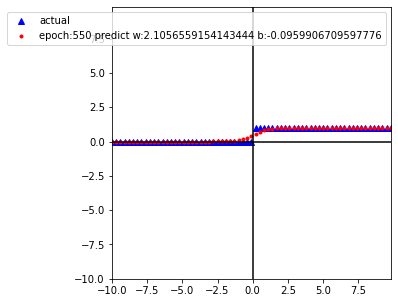

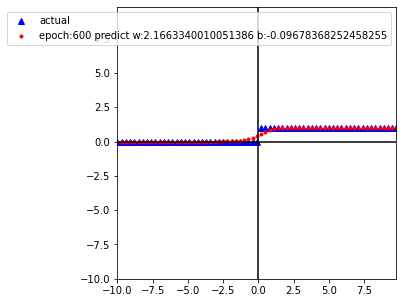

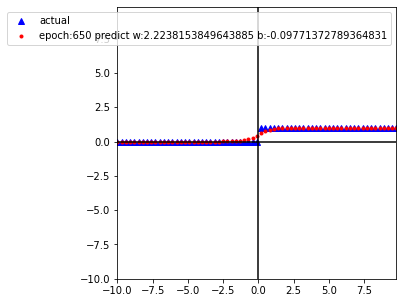

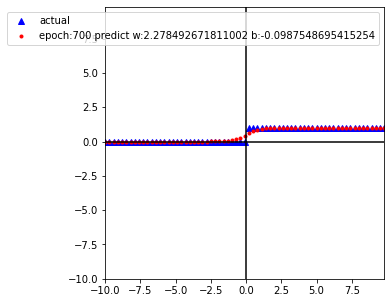

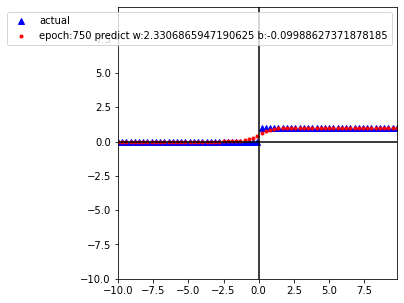

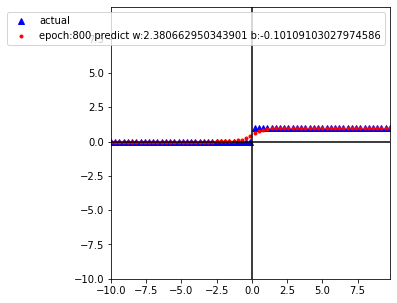

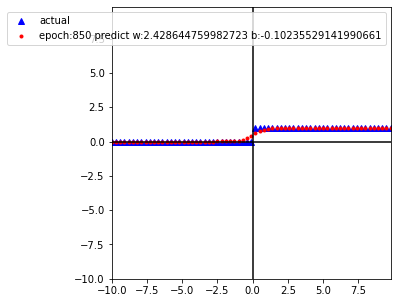

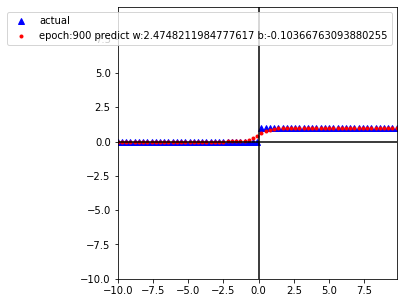

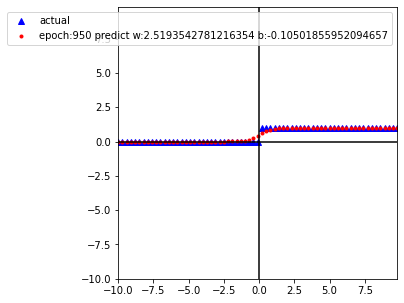

In [59]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs]) #else를 사용하는 경우 조건을 맨 뒤가 아닌 for문 앞에 적어준다
#참(0보다 크면 다 1), 거짓(아니면 다 0) 두가지 값만 존재

wp,bp,wbhl = gradient_descent(xs,ys,epochs=1000)
min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(0,len(wbhl)):
  if wi > 5 and wi%50!=0: #초반 5개 외, 50번 마다 그래프 출력
    continue
  w,b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f'epoch:{wi} predict w:{w} b:{b}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

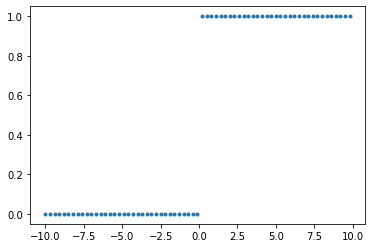

In [54]:
plt.plot(xs,ys,'.') # 참/거짓 두 값 뿐
plt.show()

In [ ]:
#위의 내용을 머신러닝에서 한다면

xs2 = [[x] for x in xs]
xs2

In [62]:
from sklearn.model_selection import train_test_split
#학습데이터와 테스트 데이터를 분리시켜 준다

train_xs, test_xs, train_ys, test_ys = train_test_split(xs2,ys)

In [64]:
len(xs2), len(ys), len(train_xs), len(test_xs), len(train_ys), len(test_ys)
#원본 데이터 길이 = 67
#분리 -> 각각 50개 학습용, 17개 테스트용

(67, 67, 50, 17, 50, 17)

In [66]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression() #학습 모델 개체 생성
lr_model.fit(train_xs,train_ys) #학습시키기
pre_vals = lr_model.predict(test_xs) #예측(독립변수 대입)
for i,y in enumerate(test_ys):
  print(f"actual:{y}, predict:{pre_vals[i]}")
  #거의 오차가 존재하지 않는다

actual:1, predict:1
actual:1, predict:1
actual:1, predict:1
actual:0, predict:0
actual:1, predict:1
actual:1, predict:1
actual:1, predict:1
actual:1, predict:1
actual:0, predict:1
actual:1, predict:1
actual:0, predict:0
actual:1, predict:1
actual:0, predict:0
actual:0, predict:0
actual:1, predict:1
actual:0, predict:0
actual:0, predict:0


In [69]:
print(lr_model.score(train_xs,train_ys)) #학습용 데이터의 예측률이 더 높게 나옴 - 풀었던 문제 푸는게 쉽다
print(lr_model.score(test_xs,test_ys))

1.0
0.9411764705882353


https://scikit-learn.org/stable/user_guide.html  
해당 메뉴얼에서 코드들 활용 가능

x > 5 일 때, 99.7% 확률로 1  
2 < x <= 5 일 때, 90% 확률로 1  
0 < x <=2 일 때, 70% 확률로 1  
x <= 0 일 때, 100% 확률로 1  

위의 사건을 코드로 표현해보자

In [91]:
xs = np.arange(-10, 10, 0.3)
ys1 = []
for x in xs:
  if x > 5:
    if np.random.uniform(0, 10) > 0.03: #0~10 사이의 랜덤한 수가 0.03보다 크면 1 = 99.3% 확률로 1
        ys1.append(1)
    else:
        ys1.append(0)
  elif x > 2:
    if np.random.uniform(0, 10) > 1:
        ys1.append(1)
    else:
        ys1.append(0)
  elif x > 0:
    if np.random.uniform(0, 10) > 3:
        ys1.append(1)
    else:
        ys1.append(0)
  else:
      ys1.append(0)

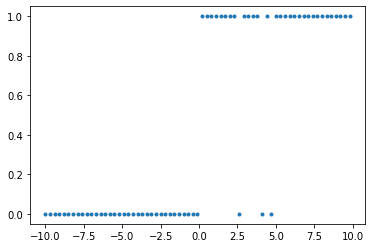

In [92]:
plt.plot(xs,ys1,'.')
plt.show()

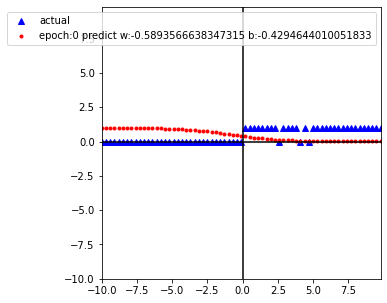

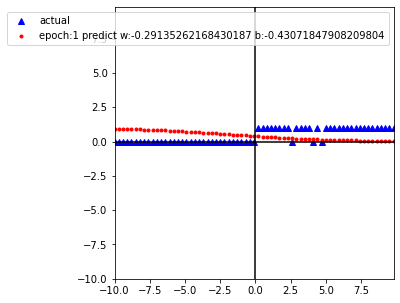

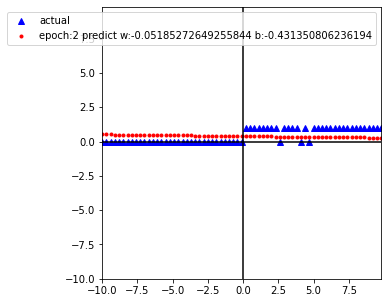

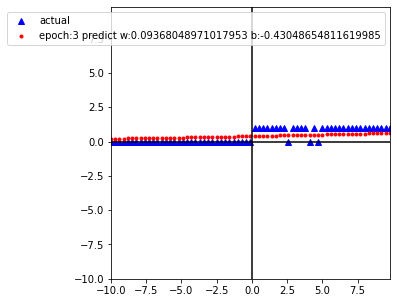

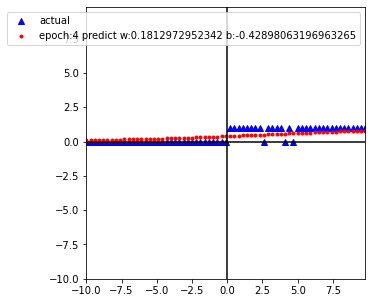

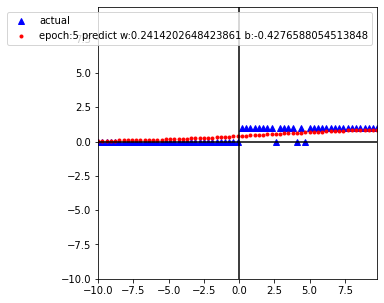

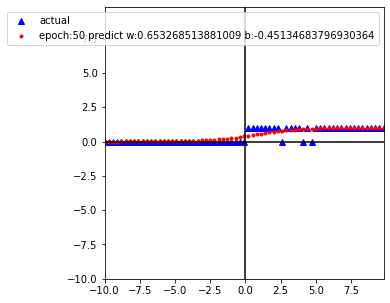

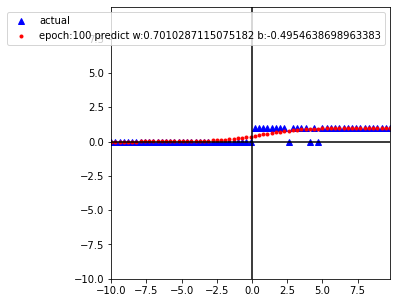

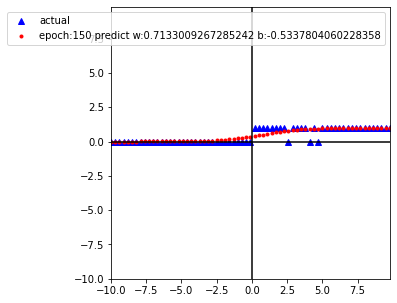

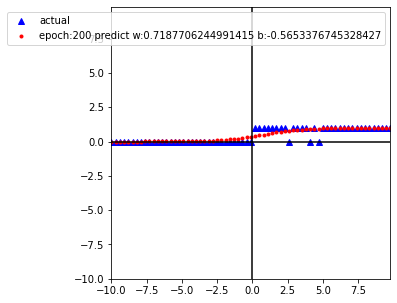

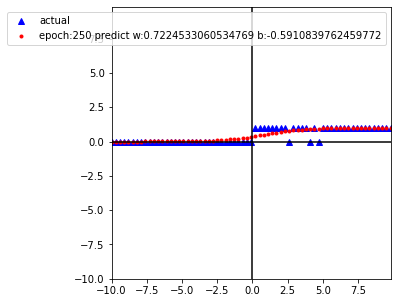

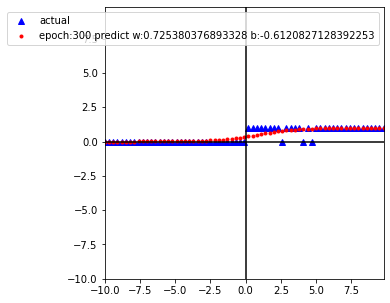

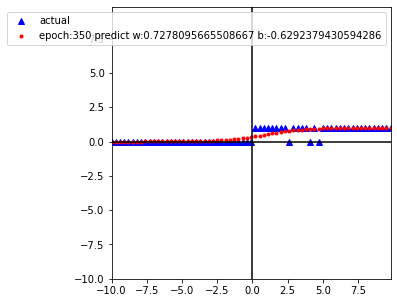

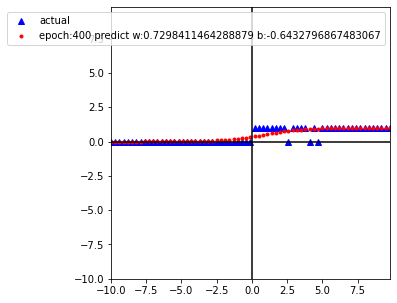

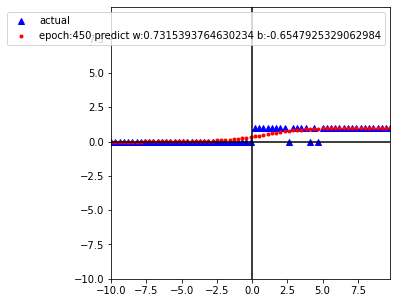

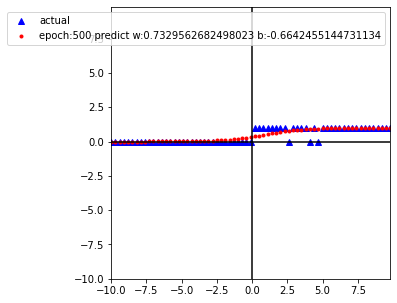

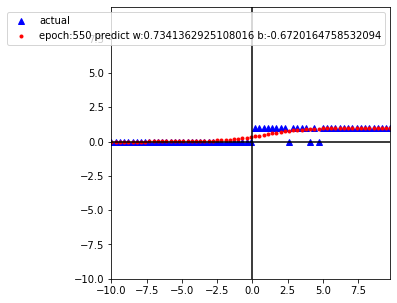

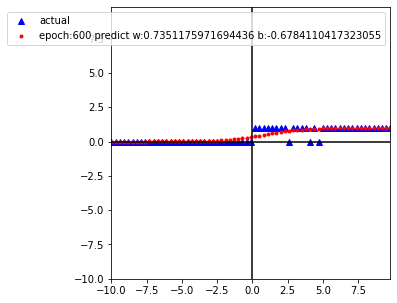

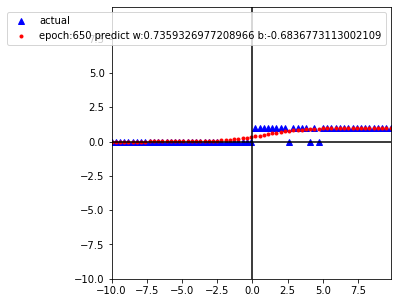

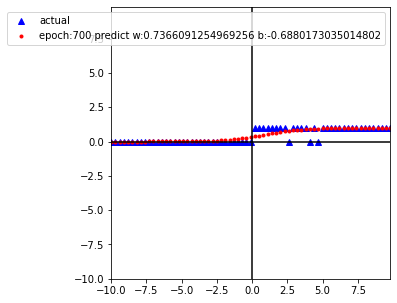

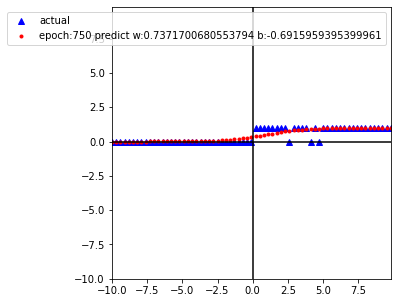

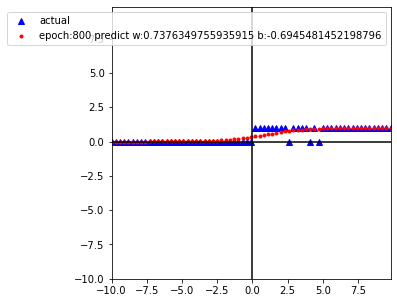

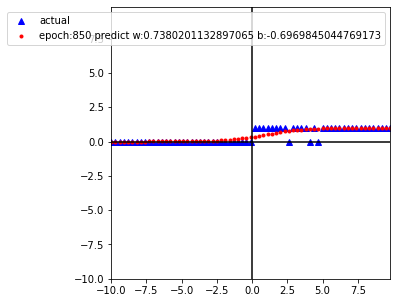

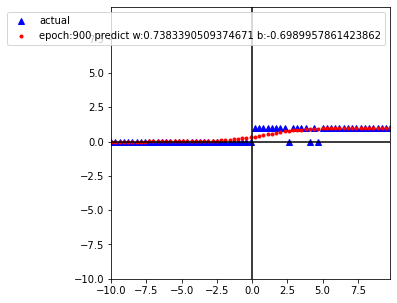

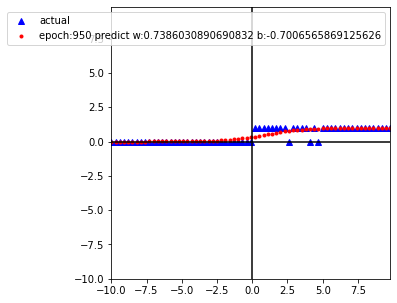

In [93]:
#xs,ys1 을 이용해서 위의 그래프 다시 그려보기 

wp,bp,wbhl = gradient_descent(xs,ys1,epochs=1000)
min_val = min(min(xs),min(ys1))
max_val = max(max(xs),max(ys1))

for wi in range(0,len(wbhl)):
  if wi > 5 and wi%50!=0: 
    continue
  w,b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys1,'b^',label='actual')
  plt.plot(xs,pre_ys,'r.',label=f'epoch:{wi} predict w:{w} b:{b}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()